In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
water_data = pd.read_csv('Water Quality Prediction.csv')

In [3]:
water_data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [4]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

([<matplotlib.patches.Wedge at 0x12769a0b0>,
 [Text(-0.8260765699987563, 0.7263590713270468, 'Bad(0)'),
  Text(0.8260765359954333, -0.7263591099984813, 'Good(1)')],
 [Text(-0.4505872199993216, 0.39619585708748, '77.042%'),
  Text(0.45058720145205444, -0.3961958781809897, '22.958%')])

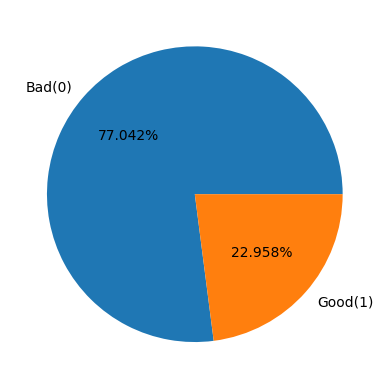

In [5]:
plt.pie(
    water_data['Target'].value_counts(),
    labels = ['Bad(0)','Good(1)'],
    autopct = "%1.3f%%",
)

In [6]:
enc = water_data.select_dtypes(include='object')
enc

,Color,Source,Month
0,Colorless,NaN,January
1,Faint Yellow,Lake,November
2,Light Yellow,River,January
3,Near Colorless,Ground,April
4,Light Yellow,Spring,June
...,...,...,...
1048570,Near Colorless,Stream,March
1048571,Near Colorless,Lake,December
1048572,Near Colorless,Spring,June
1048573,Near Colorless,Well,May


In [7]:
for column in enc:
  enc_mode = water_data[column].mode()[0]
  water_data[column].fillna(enc_mode,inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1340/582715426.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(enc_mode,inplace = True)


In [8]:
water_data.isna().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                         0
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                        0
Water Temperature         29688
Air Temperature            5303
Month                         0
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

In [9]:
numerical_data = water_data.select_dtypes(include=['float64','int64'])
numerical_data = numerical_data.drop(columns = ['Target','Day','Time of Day'], axis = 1)
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Turbidity               1039881 non-null  float64
 8   Fluoride                1015357 non-null  float64
 9   Copper                  1013693 non-null  float64
 10  Odor                    1017243 non-null  float64
 11  Sulfate                 1014050 non-null  float64
 12  Conductivity            1019772 non-null  float64
 13  Chlorine                1038413 non-null  float64
 14  Ma

In [10]:
for column in numerical_data:
  mean_value = water_data[column].mean()
  water_data[column].fillna(mean_value, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1340/2336187354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(mean_value, inplace = True)


In [11]:
water_data.isna().sum()

Index                         0
pH                            0
Iron                          0
Nitrate                       0
Chloride                      0
Lead                          0
Zinc                          0
Color                         0
Turbidity                     0
Fluoride                      0
Copper                        0
Odor                          0
Sulfate                       0
Conductivity                  0
Chlorine                      0
Manganese                     0
Total Dissolved Solids        0
Source                        0
Water Temperature             0
Air Temperature               0
Month                         0
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

In [12]:
mode_value = ['Day', 'Time of Day']
for column in mode_value:
  mode_data = water_data[column].mode()[0]
  water_data[column].fillna(mode_data, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1340/2306118897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(mode_data, inplace = True)


In [13]:
water_data.isna().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
scaler = LabelEncoder()

In [16]:
for value in enc:
  water_data[value+'ENC'] = scaler.fit_transform(water_data[value])

In [17]:
water_data = water_data.drop(columns = ['Color', 'Source', 'Month'])

In [18]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1048575 non-null  float64
 2   Iron                    1048575 non-null  float64
 3   Nitrate                 1048575 non-null  float64
 4   Chloride                1048575 non-null  float64
 5   Lead                    1048575 non-null  float64
 6   Zinc                    1048575 non-null  float64
 7   Turbidity               1048575 non-null  float64
 8   Fluoride                1048575 non-null  float64
 9   Copper                  1048575 non-null  float64
 10  Odor                    1048575 non-null  float64
 11  Sulfate                 1048575 non-null  float64
 12  Conductivity            1048575 non-null  float64
 13  Chlorine                1048575 non-null  float64
 14  Ma

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [38]:
X = water_data.drop(columns=['Target','Index'], axis=1)
y = water_data['Target']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [40]:
y_train.value_counts()

Target
0    646273
1    192587
Name: count, dtype: int64

In [41]:
smote = SMOTE(random_state = 42)

In [42]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [43]:
y_train.value_counts()

Target
0    646273
1    192587
Name: count, dtype: int64

In [44]:
y_train_smote.value_counts()

Target
0    646273
1    646273
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14905bbb0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Bad(0)'),
  Text(1.1, -2.6942229581241775e-16, 'Good(1)')])

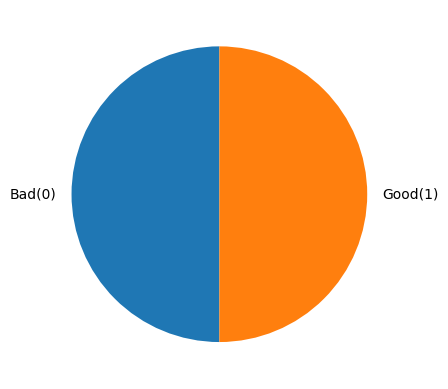

In [45]:
plt.pie(
    y_train_smote.value_counts(),
    labels = ['Bad(0)', 'Good(1)'],
    startangle=90,
)

In [46]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [55]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, balanced_accuracy_score

In [50]:
y_pred = rf_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8759173163579144

In [56]:
# F1 Score
f1 = f1_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.7821
Precision: 0.6552
Recall: 0.9701
Balanced Accuracy: 0.9090


• High Recall, Low Precision: 
Your model is very effective at finding nearly all the true positives (high recall) but at the cost of also predicting some negatives as positives (lower precision). This is common in imbalanced datasets where the model might be more inclined to predict the minority class (class 1) to avoid missing any positive cases.

• Moderate F1 Score: 
The F1 score reflects the balance between precision and recall. While your model is good at detecting positives, the trade-off between precision and recall brings the F1 score to a moderate level.

•Strong Balanced Accuracy: 
Despite the class imbalance, your model is doing well across both classes, which is a good sign of robust performance.

In [52]:
# Extracting feature importances
importances = rf_model.feature_importances_

# Associating importances with feature names
feature_names = X_train.columns  # If you're using a DataFrame
importance_dict = dict(zip(feature_names, importances))

# Sorting the features by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

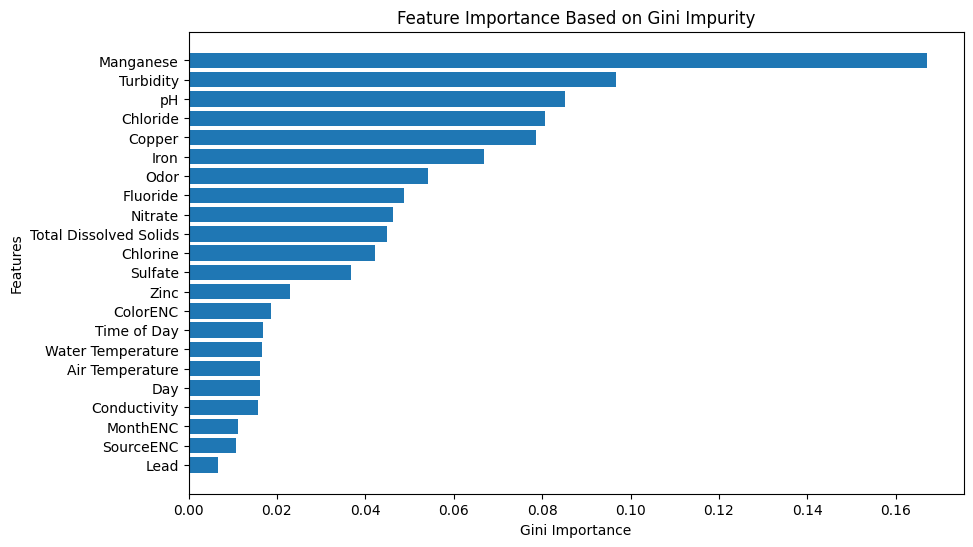

In [53]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on Gini Impurity')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()